In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

In [2]:
# power curve
arr = np.random.randn(200, 10000) + 0.4
t,p = scipy.stats.ttest_1samp(arr, 0)

In [3]:
p.shape

(10000,)

In [4]:
p_thresholds = np.logspace(-8, 0, 40)
power = np.array([(p<p_t).mean() for p_t in p_thresholds])

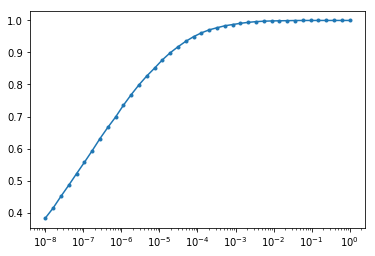

In [5]:
plt.semilogx(p_thresholds, power, '.-')

In [3]:
# you have to restart the notebook before running this
# because "%matplotlib notebook" doesn't work if you already ran "%matplotlib inline"
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

from ipywidgets import interact
import ipywidgets as widgets

<IPython.core.display.Javascript object>


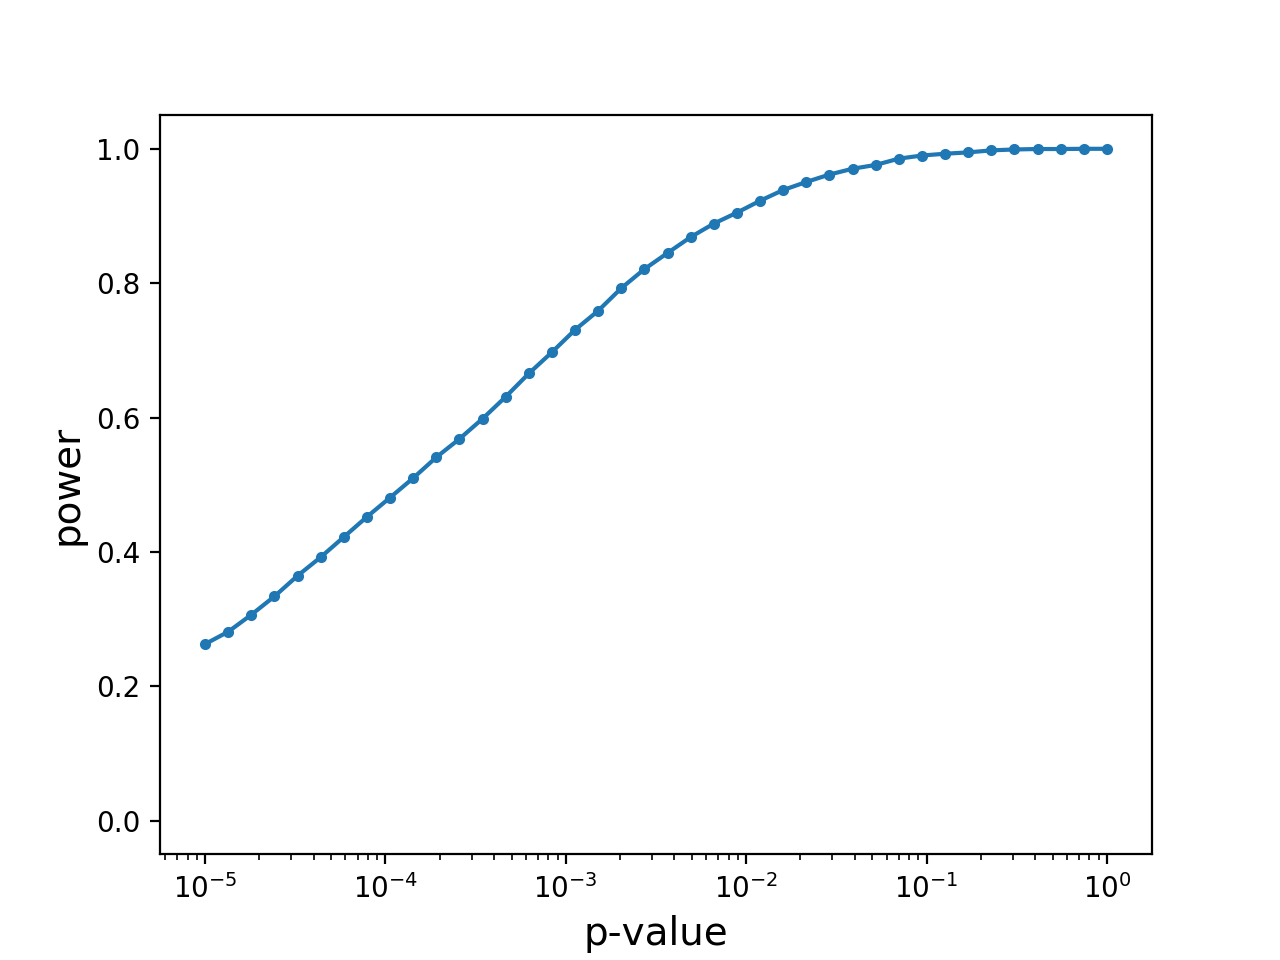

interactive(children=(FloatSlider(value=0.3, description='effect_size', max=1.5), IntSlider(value=100, descrip…

In [4]:
num_tests = 3000
p_thresholds = np.logspace(-5, 0, 40)

power_line = plt.semilogx(p_thresholds, p_thresholds, '.-')
plt.xlabel('p-value', size=14)
plt.ylabel('power', size=14)

def update(effect_size, n):
    arr = np.random.randn(n, num_tests) + effect_size
    t,p = scipy.stats.ttest_1samp(arr, 0)
    
    power = np.array([(p<p_t).mean() for p_t in p_thresholds])    
    power_line[0].set_ydata(power)

effect_size_slider = widgets.FloatSlider(value=0.3, min=0, max=1.5, step=0.1)
n_slider = widgets.IntSlider(value=100, min=10, max=250, step=10)
interact(update, effect_size=effect_size_slider, n=n_slider);